In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  "font.size": 16,
  "grid.alpha": 0.25})

### Function declarations

In [4]:
def plot_time_series(x, y, xlabel="Time", ylabel="Value", figsize=(10, 4), 
                     use_date_locator=True, title=None, use_scatter=True):
    fig, ax = plt.subplots(figsize=figsize)

    ax.plot(x, y, linestyle="-", marker=".")

    if use_date_locator:
        formatter = mdates.DateFormatter("%d/%m/%Y")
        # locator = mdates.YearLocator(base=2)
        locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 3))
        ax.xaxis.set_major_formatter(formatter)
        ax.xaxis.set_major_locator(locator)

    ax.grid("on")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if title is not None:
        ax.set_title(title)

    if use_date_locator:
        for j, label in enumerate(ax.get_xticklabels()):
            label.set_rotation(40)
            label.set_horizontalalignment('right')

    plt.show()


### Pre-processing

In [5]:
file_path = "./data/CDB THN 2021-2024.csv"
df_cdb = pd.read_csv(file_path)
df_cdb["Tgl. Mohon"] = pd.to_datetime(df_cdb["Tgl. Mohon"], format="%d/%m/%Y")
df_cdb["Tgl. Lahir"] = pd.to_datetime(df_cdb["Tgl. Lahir"], format="%d/%m/%Y")
df_cdb
df_cdb.to_csv("./data/df_cdb.csv", index=False)

In [6]:
df_cdb_with_initial = df_cdb.copy()
df_cdb_with_initial["initial Varian Plus"] = df_cdb_with_initial["Varian Plus"].apply(lambda x: x[0])
df_cdb_with_initial

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus
0,2021-01-02,MULKAN,JL AL MAKMUR I,DAMAI,BALIKPAPAN KOTA,LAKI-LAKI,1996-08-18,Wiraswasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTP/SMP,LD0,L
1,2021-01-02,HANIE ZULFA NABIELA,JL MT HARYONO PERUM GRAND CITY,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,2003-04-14,Pegawai Swasta-Jasa,"< Rp. 900.000,-",AKADEMI/DIPLOMA,LP0,L
2,2021-01-02,HASANA PUTRI,JL LETJEND S PARMAN,SUMBER REJO,BALIKPAPAN TENGAH,PEREMPUAN,1997-02-13,Pegawai Swasta-Pertanian,"Rp. 900.001,- s/d Rp. 1.250.000,-",SARJANA,LPA,L
3,2021-01-02,SUSARI HATI,JL MARSMA R ISWAHYUDI,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,1982-11-16,Pegawai Swasta-Industri,"Rp. 4.000.001,- s/d Rp. 6.000.000,-",SLTA/SMU,LP0,L
4,2021-01-02,ROY KILAPONG,JL MT HARYONO,DAMAI BAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,1976-01-17,Pegawai Swasta-Jasa,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,LPA,L
...,...,...,...,...,...,...,...,...,...,...,...,...
6852,2024-08-31,RUDI AMSA,JL PADAT KARYA,MANGGAR,BALIKPAPAN TIMUR,LAKI-LAKI,2004-11-06,Pegawai Swasta-Jasa,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,MM0,M
6853,2024-08-31,MARIATI,JL. TAMAN BUKIT SARI,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,1978-03-21,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,MM0,M
6854,2024-08-31,JAMES HAROL SELA,JL. LETJEND. S. PARMAN,GUNUNGSARI ULU,BALIKPAPAN TENGAH,LAKI-LAKI,1961-01-19,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SARJANA,LP3,L
6855,2024-08-31,GOMGOM RAULI SIHOMBING,PERUM BDS II,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,1980-04-30,IBU RUMAH TANGGA,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,ML0,M


In [7]:
df_cdb_with_tipe = df_cdb_with_initial.copy()

def tipe_customer(row):
    if row[["Gender", "Tgl. Lahir", "Pekerjaan", "Pengeluaran", "Pendidikan"]].isnull().any():
        return "INSTANSI LUAR"
    else:
        return "INDIVIDU"

df_cdb_with_tipe["Tipe Pembeli"] = df_cdb_with_tipe.apply(tipe_customer, axis=1)
df_cdb_with_tipe["Umur"] = (pd.to_datetime("today") - df_cdb_with_tipe["Tgl. Lahir"]).dt.days // 365

df_cdb_with_tipe

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus,Tipe Pembeli,Umur
0,2021-01-02,MULKAN,JL AL MAKMUR I,DAMAI,BALIKPAPAN KOTA,LAKI-LAKI,1996-08-18,Wiraswasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTP/SMP,LD0,L,INDIVIDU,28
1,2021-01-02,HANIE ZULFA NABIELA,JL MT HARYONO PERUM GRAND CITY,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,2003-04-14,Pegawai Swasta-Jasa,"< Rp. 900.000,-",AKADEMI/DIPLOMA,LP0,L,INDIVIDU,22
2,2021-01-02,HASANA PUTRI,JL LETJEND S PARMAN,SUMBER REJO,BALIKPAPAN TENGAH,PEREMPUAN,1997-02-13,Pegawai Swasta-Pertanian,"Rp. 900.001,- s/d Rp. 1.250.000,-",SARJANA,LPA,L,INDIVIDU,28
3,2021-01-02,SUSARI HATI,JL MARSMA R ISWAHYUDI,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,1982-11-16,Pegawai Swasta-Industri,"Rp. 4.000.001,- s/d Rp. 6.000.000,-",SLTA/SMU,LP0,L,INDIVIDU,42
4,2021-01-02,ROY KILAPONG,JL MT HARYONO,DAMAI BAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,1976-01-17,Pegawai Swasta-Jasa,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,LPA,L,INDIVIDU,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6852,2024-08-31,RUDI AMSA,JL PADAT KARYA,MANGGAR,BALIKPAPAN TIMUR,LAKI-LAKI,2004-11-06,Pegawai Swasta-Jasa,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,MM0,M,INDIVIDU,20
6853,2024-08-31,MARIATI,JL. TAMAN BUKIT SARI,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,1978-03-21,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,MM0,M,INDIVIDU,47
6854,2024-08-31,JAMES HAROL SELA,JL. LETJEND. S. PARMAN,GUNUNGSARI ULU,BALIKPAPAN TENGAH,LAKI-LAKI,1961-01-19,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SARJANA,LP3,L,INDIVIDU,64
6855,2024-08-31,GOMGOM RAULI SIHOMBING,PERUM BDS II,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,1980-04-30,IBU RUMAH TANGGA,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,ML0,M,INDIVIDU,45


### Plot kumulatif

In [8]:
# def plot_cumulative_by_variant(df, varian_list, date_col="Tgl. Mohon", initial_varian_col="initial Varian Plus"):
#     fig, axes = plt.subplots(len(varian_list), 1, figsize=(16, 4.5 * len(varian_list)), sharex=True)

#     if len(varian_list) == 1:
#         axes = [axes]

#     for i, varian in enumerate(varian_list):
#         df_varian = df[df[initial_varian_col] == varian].copy()
#         df_varian[date_col] = pd.to_datetime(df_varian[date_col])
#         df_varian = df_varian[df_varian[date_col] >= pd.Timestamp('2021-01-01')]

#         df_daily = df_varian[[date_col]].copy()
#         df_daily["count"] = 1
#         df_daily = df_daily.groupby(date_col).agg("count").reset_index()
#         df_daily["cumulative_sum"] = df_daily["count"].cumsum()

#         axes[i].plot(df_daily[date_col], df_daily["cumulative_sum"], marker=".", linestyle="-")
#         axes[i].set_ylabel(f"Varian {varian}")
#         axes[i].grid(True)

#     formatter = mdates.DateFormatter("%Y-%b-%d")
#     locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 2))
#     axes[-1].xaxis.set_major_formatter(formatter)
#     axes[-1].xaxis.set_major_locator(locator)
#     plt.setp(axes[-1].get_xticklabels(), rotation=40, ha="right")

#     fig.suptitle("Plot Cumulative Penjualan Setiap Varian", )
#     plt.xlabel("Tanggal")

#     # Memberi jarak antar subplot dan memperluas tampilan
#     plt.subplots_adjust(hspace=0.4, left=0.06, right=0.98, top=0.94, bottom=0.06)
#     plt.show()

# varian_list = ["E", "G", "H", "J", "L", "M"]

# plot_cumulative_by_variant(df_cdb_with_tipe, varian_list)


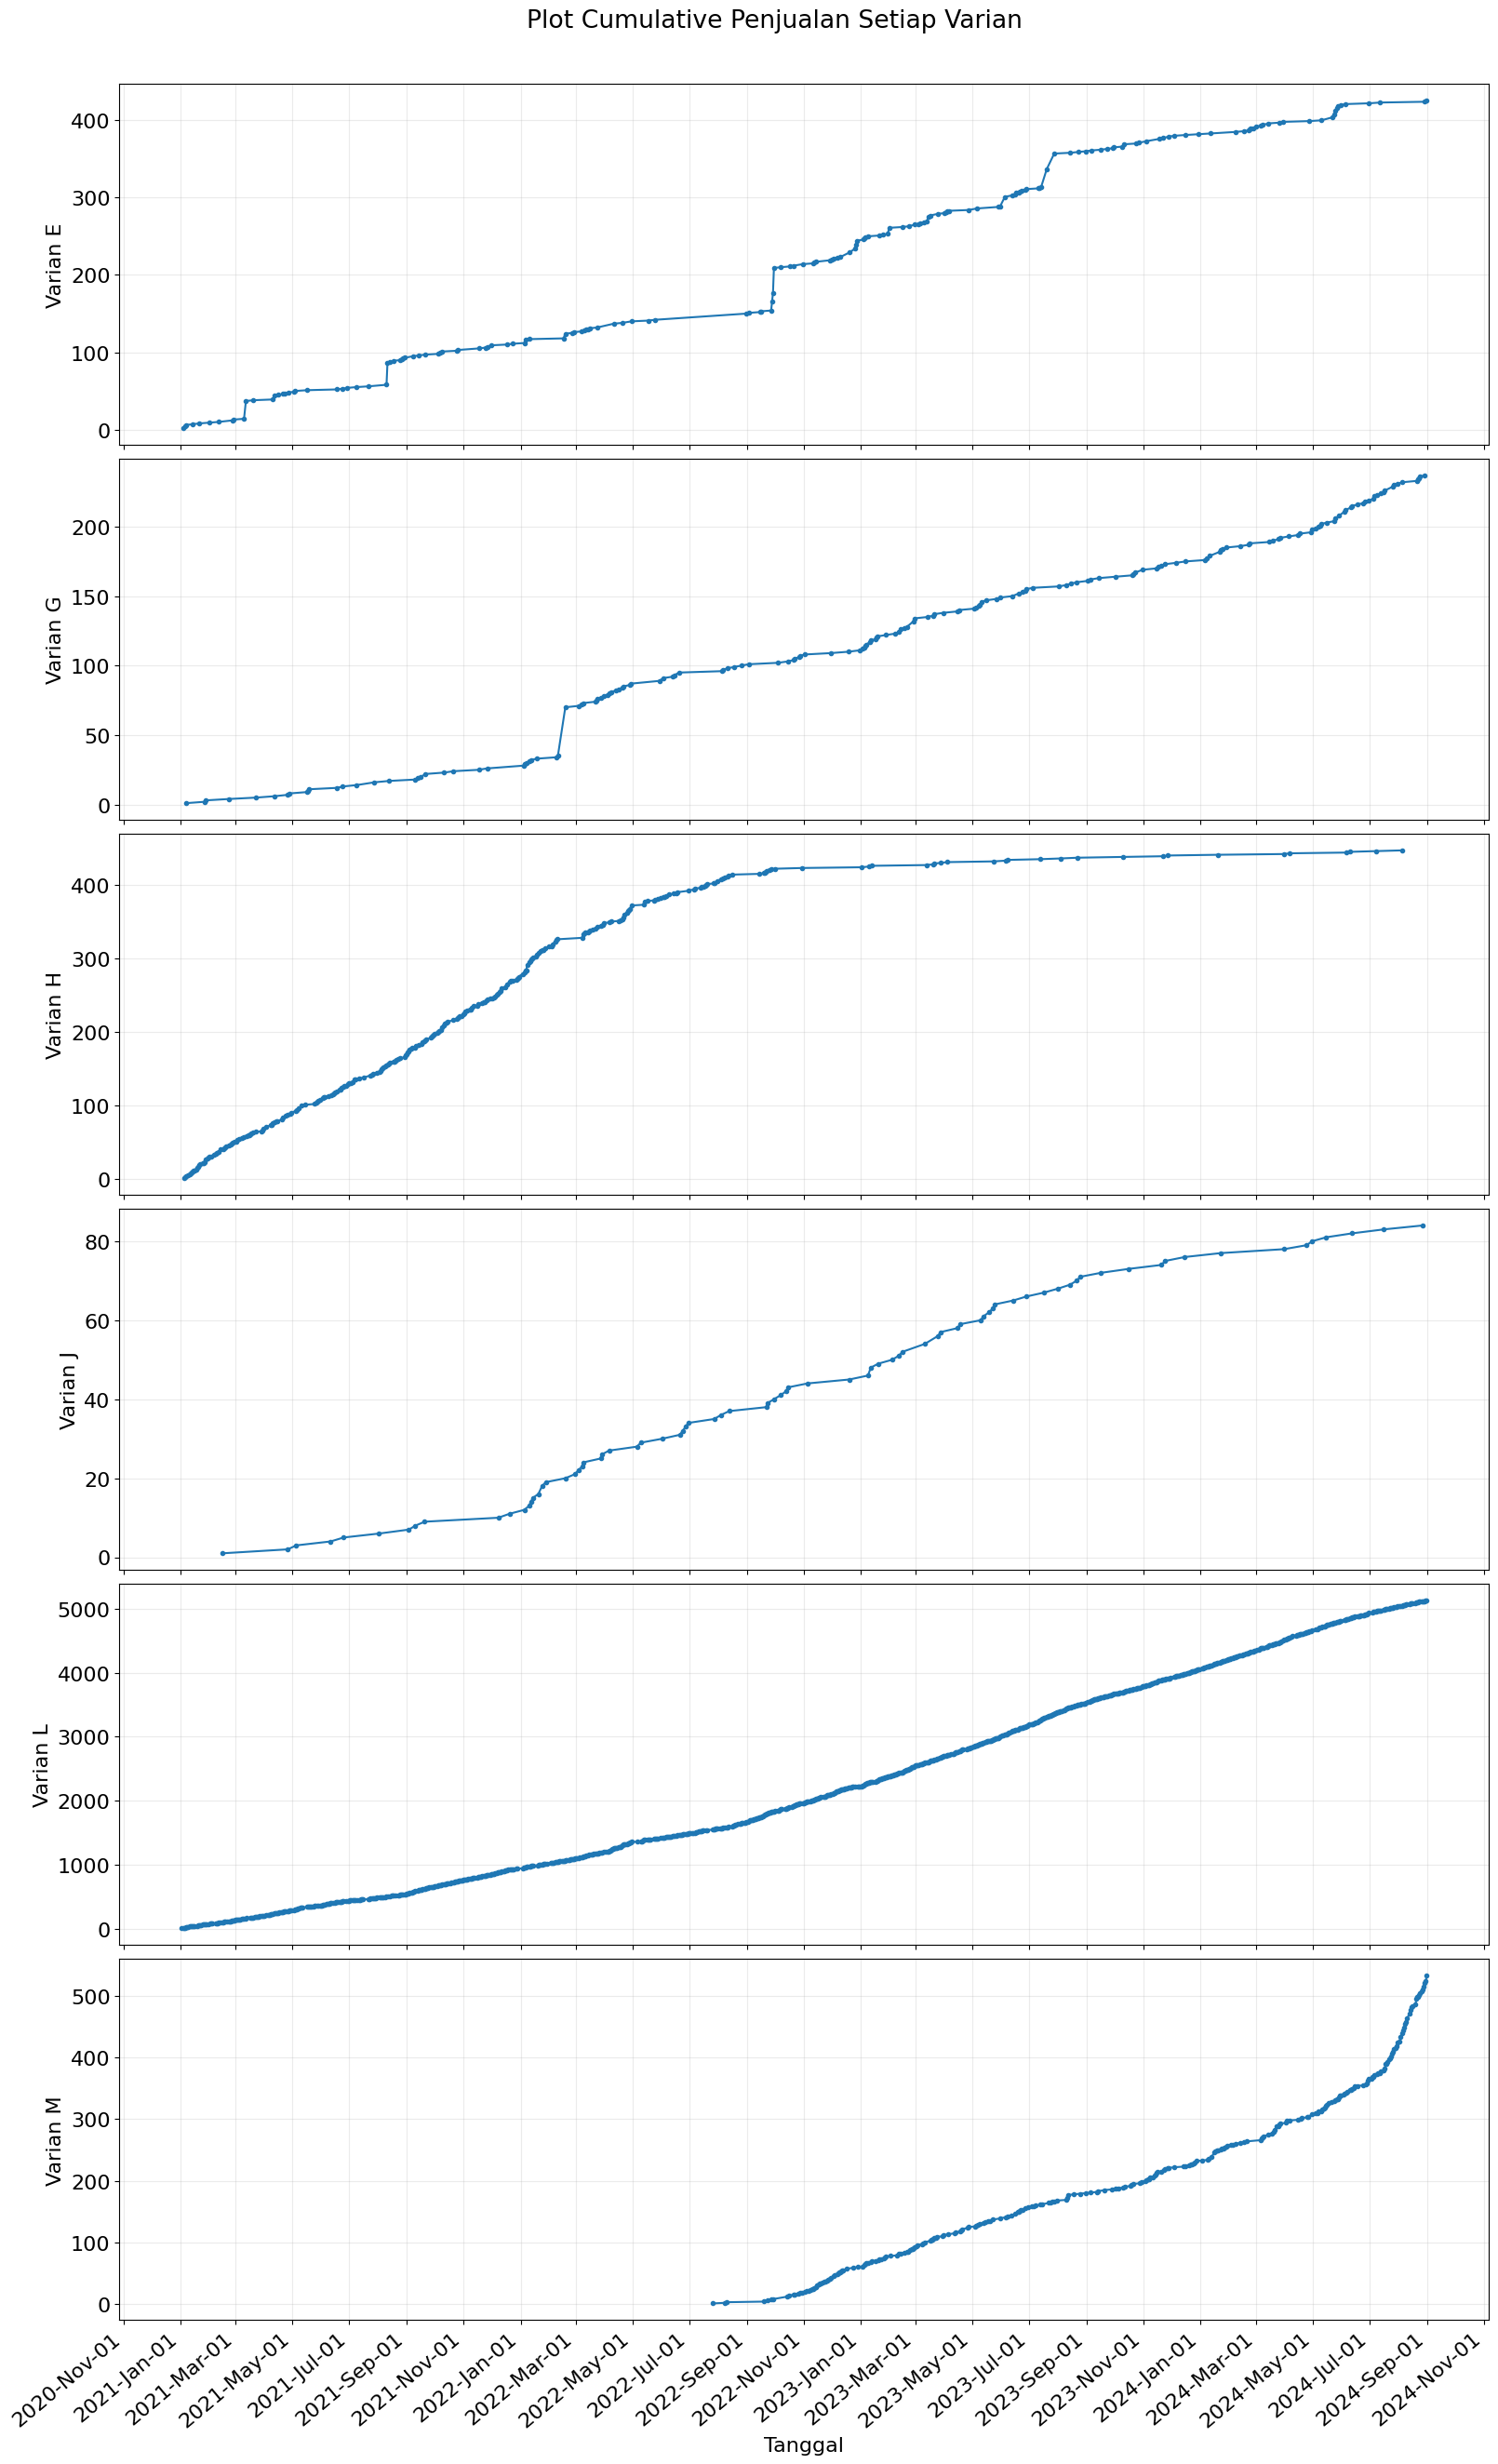

In [9]:
def plot_cumulative_by_variant(df, varian_list, date_col="Tgl. Mohon", initial_varian_col="initial Varian Plus"):
    fig, axes = plt.subplots(len(varian_list), 1, figsize=(16, 4.5 * len(varian_list)), sharex=True)

    if len(varian_list) == 1:
        axes = [axes]

    for i, varian in enumerate(varian_list):
        df_varian = df[df[initial_varian_col] == varian].copy()
        df_varian[date_col] = pd.to_datetime(df_varian[date_col])
        
        df_varian = df_varian[df_varian[date_col] >= pd.Timestamp('2021-01-01')]

        df_daily = df_varian[[date_col]].copy()
        df_daily["count"] = 1
        df_daily = df_daily.groupby(date_col).agg("count").reset_index()
        
        df_daily["cumulative_sum"] = df_daily["count"].cumsum()

        axes[i].plot(df_daily[date_col], df_daily["cumulative_sum"], marker=".", linestyle="-")
        axes[i].set_ylabel(f"Varian {varian}")
        axes[i].grid(True)

    formatter = mdates.DateFormatter("%Y-%b-%d")
    locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 2))
    axes[-1].xaxis.set_major_formatter(formatter)
    axes[-1].xaxis.set_major_locator(locator)
    plt.setp(axes[-1].get_xticklabels(), rotation=40, ha="right")

    fig.suptitle("Plot Cumulative Penjualan Setiap Varian")
    plt.xlabel("Tanggal")
    plt.subplots_adjust(hspace=0.04, left=0.06, right=0.98, top=0.95, bottom=0.06)
    plt.show()

varian_list = ["E", "G", "H", "J", "L", "M"]

plot_cumulative_by_variant(df_cdb_with_tipe, varian_list)


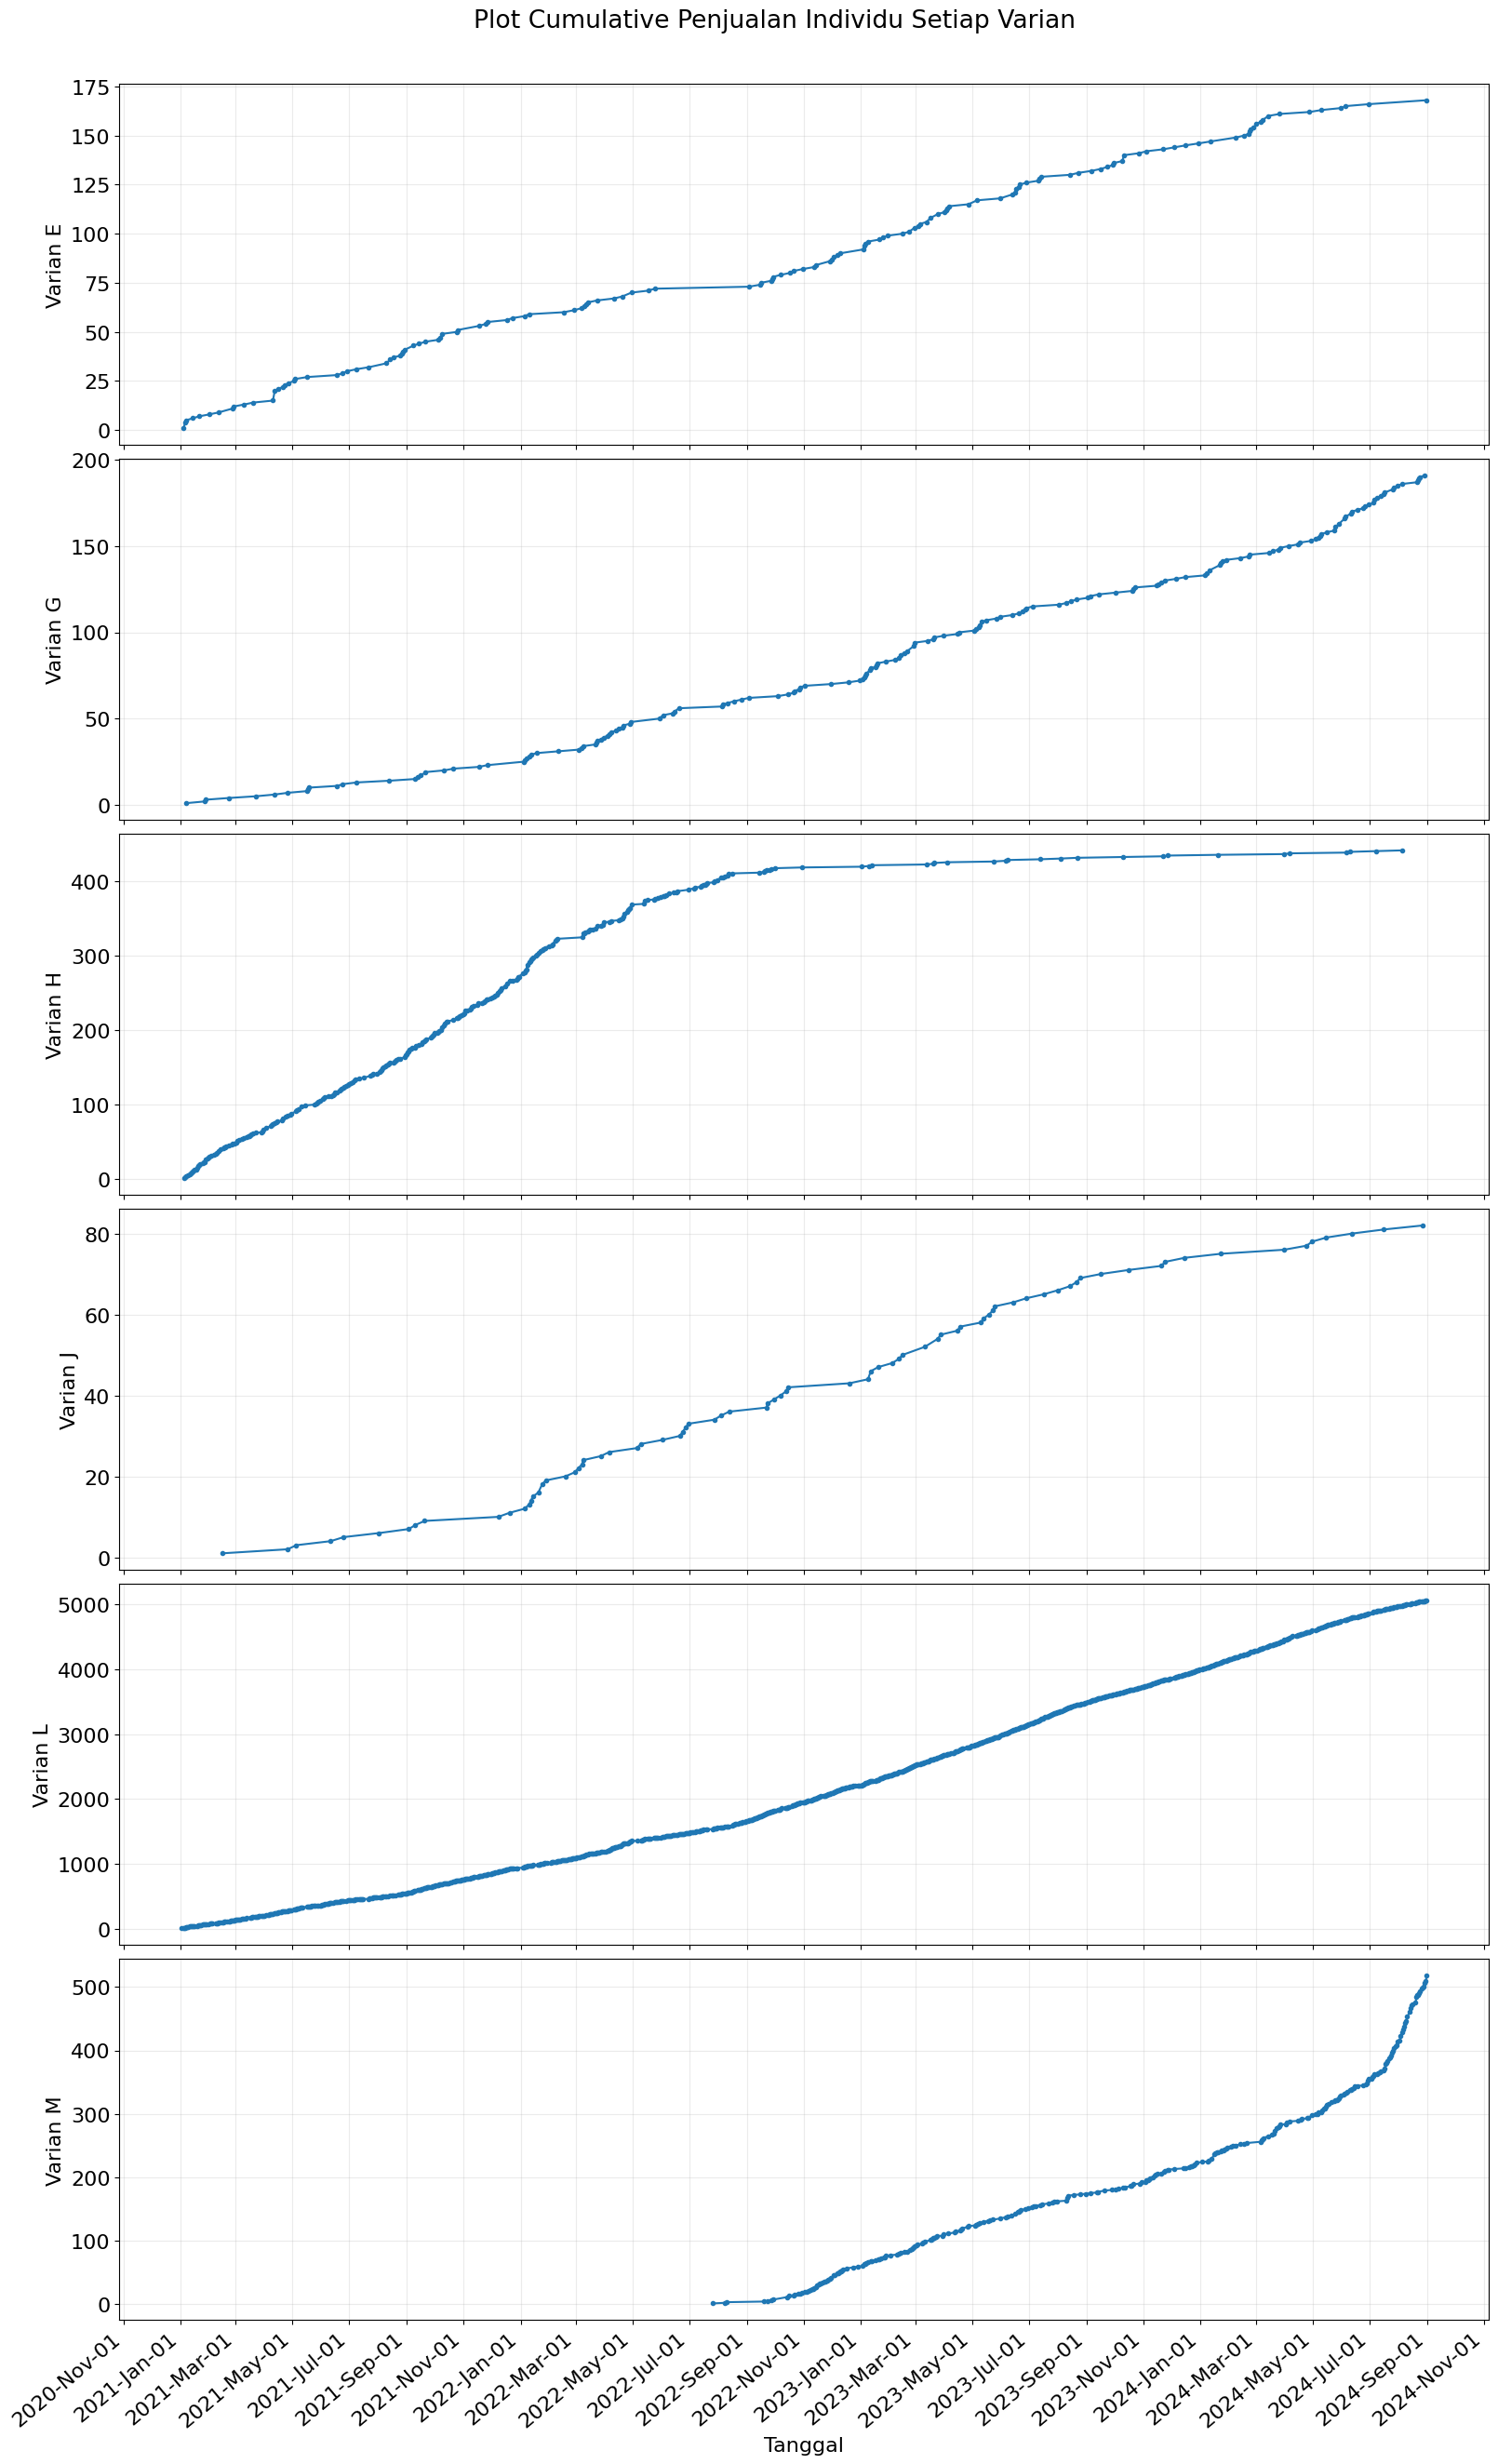

In [10]:
def plot_cumulative_by_variant_individual(df, varian_list, date_col="Tgl. Mohon",
                                          initial_varian_col="initial Varian Plus",
                                          buyer_type_col="Tipe Pembeli"):
    fig, axes = plt.subplots(len(varian_list), 1, figsize=(16, 4.5 * len(varian_list)), sharex=True)

    if len(varian_list) == 1:
        axes = [axes]

    for i, varian in enumerate(varian_list):
        # Filter varian dan tipe pembeli Individu
        df_varian = df[
            (df[initial_varian_col] == varian) &
            (df[buyer_type_col].str.lower() == "individu")
        ].copy()
        df_varian[date_col] = pd.to_datetime(df_varian[date_col])
        
        df_varian = df_varian[df_varian[date_col] >= pd.Timestamp('2021-01-01')]

        df_daily = df_varian[[date_col]].copy()
        df_daily["count"] = 1
        df_daily = df_daily.groupby(date_col).agg("count").reset_index()
        
        df_daily["cumulative_sum"] = df_daily["count"].cumsum()

        axes[i].plot(df_daily[date_col], df_daily["cumulative_sum"], marker=".", linestyle="-")
        axes[i].set_ylabel(f"Varian {varian}")
        axes[i].grid(True)

    formatter = mdates.DateFormatter("%Y-%b-%d")
    locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 2))
    axes[-1].xaxis.set_major_formatter(formatter)
    axes[-1].xaxis.set_major_locator(locator)
    plt.setp(axes[-1].get_xticklabels(), rotation=40, ha="right")

    fig.suptitle("Plot Cumulative Penjualan Individu Setiap Varian")
    plt.xlabel("Tanggal")
    plt.subplots_adjust(hspace=0.04, left=0.06, right=0.98, top=0.95, bottom=0.06)
    plt.show()

varian_list = ["E", "G", "H", "J", "L", "M"]

plot_cumulative_by_variant_individual(df_cdb_with_tipe, varian_list)
